<a href="https://colab.research.google.com/github/anirxudh/Deep-Learning-Lab-Tutorial-KTU/blob/main/Exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT NO 9
## Anirudh S Nair
### Timeseries Forecast Prediction

# Import Libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Data Loading and processing

#### use Nifty50_all data

In [15]:
df=pd.read_csv("/content/NIFTY50_all.csv", index_col='Date', parse_dates=True)
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,ZEEL,EQ,185.50,187.00,188.00,183.75,187.50,187.20,185.83,10409948,1.934494e+14,62523.0,2056205.0,0.1975
2020-11-24,ZEEL,EQ,187.20,189.00,190.90,187.50,188.25,188.30,188.87,10723549,2.025318e+14,58930.0,1699719.0,0.1585
2020-11-25,ZEEL,EQ,188.30,189.85,193.50,187.00,187.85,188.40,190.45,19366032,3.688257e+14,103144.0,4694198.0,0.2424


In [41]:
# modifying df so that only required coloumns are taken for prediction
df=df[['Open', 'High', 'Low', 'Close']]
df

,Open,High,Low,Close
Date,,,,
2007-11-27,770.00,1050.00,770.00,962.90
2007-11-28,984.00,990.00,874.00,893.90
2007-11-29,909.00,914.75,841.00,884.20
2007-11-30,890.00,958.00,890.00,921.55
2007-12-03,939.75,995.00,922.00,969.30
...,...,...,...,...
2020-11-23,187.00,188.00,183.75,187.20
2020-11-24,189.00,190.90,187.50,188.30
2020-11-25,189.85,193.50,187.00,188.40


### Create Scaler Obejct

In [17]:
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df)

#### Data split

In [18]:
train=df_scaled[:1086]
test=df_scaled[1086:]

# Data Plotting

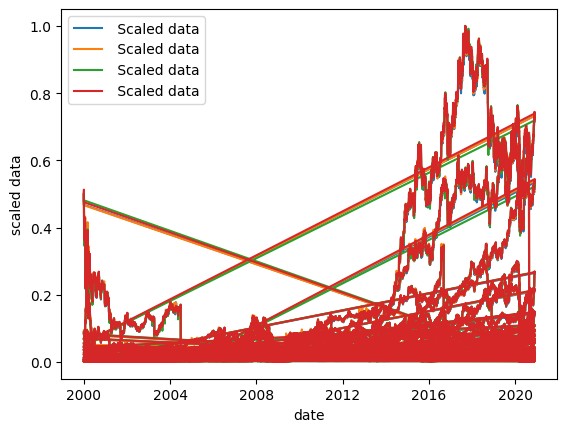

In [22]:

plt.plot(df.index, df_scaled, label=' Scaled data')
plt.xlabel('date')
plt.ylabel('scaled data')
plt.legend()
plt.show()

# Time Series generation

In [25]:
n_input=3
n_feature=4
generator=TimeseriesGenerator(train, train, length=n_input, batch_size=1)

In [26]:
generator[0]

(array([[[0.02280524, 0.03107984, 0.02345993, 0.02903101],
         [0.02921407, 0.0292872 , 0.02666391, 0.02693073],
         [0.02696798, 0.02703894, 0.02564727, 0.02663548]]]),
 array([[0.02639897, 0.02833113, 0.02715683, 0.02777237]]))

# Model Building and Fitting

In [35]:
model=models.Sequential([
    layers.SimpleRNN(units=100, activation='relu', input_shape=(n_input, n_feature)),
    layers.Dense(4, activation='tanh')
])

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [38]:
r=model.fit(generator, epochs=100)

Epoch 1/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2428 - loss: 7.1360e-06
Epoch 2/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2885 - loss: 2.1694e-06
Epoch 3/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3124 - loss: 2.3946e-06
Epoch 4/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3341 - loss: 1.9019e-06
Epoch 5/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3008 - loss: 3.1855e-06
Epoch 6/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3342 - loss: 1.0771e-06
Epoch 7/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3157 - loss: 1.3772e-06
Epoch 8/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2868 - loss: 1.2638e-06
Epoch 9/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2938 - loss: 1.1493e-06
Epoch 10/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3253 - loss: 1.5997e-06
Epoch 11/100
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0

# Prediction

In [39]:
test_generator=TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [40]:
loss, acc = model.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


231065/231065 ━━━━━━━━━━━━━━━━━━━━ 396s 2ms/step - accuracy: 0.1576 - loss: 9.0174e-04


In [42]:
print(f' loss: {loss} \n accuracy: {acc}')

 loss: 0.0009314980125054717 
 accuracy: 0.16068638861179352


In [43]:
x_test, y_test = test_generator[55]

In [45]:
predict=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


In [47]:
print(f' predict: {predict[0,0]} true: {y_test[0]}')
print(f' predict: {predict[0,1]} true: {y_test[0]}')
print(f' predict: {predict[0,2]} true: {y_test[0]}')
print(f' predict: {predict[0,3]} true: {y_test[0]}')

 predict: 0.003935457672923803 true: [0.0033826  0.00337464 0.00344428 0.00341676]
 predict: 0.003935528919100761 true: [0.0033826  0.00337464 0.00344428 0.00341676]
 predict: 0.003900281386449933 true: [0.0033826  0.00337464 0.00344428 0.00341676]
 predict: 0.00398276699706912 true: [0.0033826  0.00337464 0.00344428 0.00341676]
